In [1]:
#Loading the dataset
import pandas as pd
data_SMS = pd.read_csv('C:/Users/Bhhaanu/Downloads/smsspamcollection/SMSSpamCollection', sep = '\t', header=None, names=["Class", "SMS_Text"])

In [2]:
data_SMS

,Class,SMS_Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<AxesSubplot:>

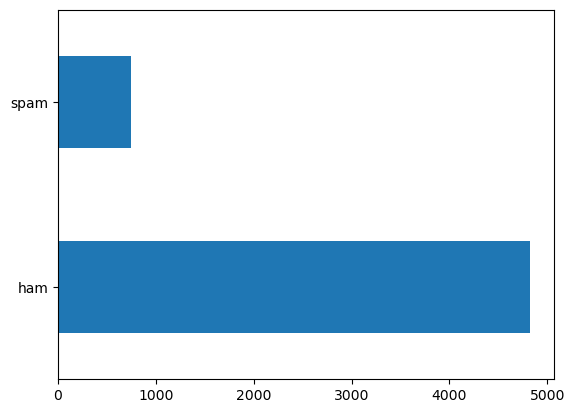

In [3]:
#Ploting the frequencies of data classes (spam and ham).
data_SMS.Class.value_counts().plot(kind='barh')

In [4]:
#Converting the class categories (spam and ham) into a binary format of 0 and 1.
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit_transform(['yes', 'no', 'no', 'yes'])

array([[1],
       [0],
       [0],
       [1]])

In [5]:
data_SMS["Class"]

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Class, Length: 5572, dtype: object

In [6]:
lb = preprocessing.LabelBinarizer()
data_SMS["Class"]=lb.fit_transform(data_SMS["Class"])

In [7]:
data_SMS

,Class,SMS_Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
#Printing out the frequency of the top 10 words.
from collections import Counter
Counter(" ".join(data_SMS["SMS_Text"]).split()).most_common(10)

[('to', 2145),
 ('you', 1626),
 ('I', 1469),
 ('a', 1337),
 ('the', 1207),
 ('and', 858),
 ('in', 800),
 ('is', 788),
 ('i', 748),
 ('u', 698)]

In [9]:
#Spliting the data into training and test sets. Use 80% for training and 20% for testing.
from sklearn.model_selection import train_test_split
X = data_SMS["SMS_Text"]
y = data_SMS["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
print(X_train,X_test,y_train,y_test)

1978    Reply to win £100 weekly! Where will the 2006 ...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
4086    Orange brings you ringtones from all time Char...
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: SMS_Text, Length: 4457, dtype: object 3245    Squeeeeeze!! This is christmas hug.. If u lik ...
944     And also I've sorta blown him off a couple tim...
1044    Mmm thats better now i got a roast down me! i...
2484        Mm have some kanji dont eat anything heavy ok
812     So there's a ring that comes with the guys cos...
                            

In [11]:
#Extracting the features using word frequencies.
from sklearn.feature_extraction.text import CountVectorizer
WordVectorizer=CountVectorizer()

In [12]:
TrainData_Freq = WordVectorizer.fit_transform(X_train.values)
WordVectorizer.vocabulary_
TrainData_Freq.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
#Creating the Multinomial Naïve Bayes classifier
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()

In [14]:
#Train the model
NB_classifier.fit(TrainData_Freq, y_train)

MultinomialNB()

In [15]:
#Calculate the accuracy score
TestData_Freq = WordVectorizer.transform(X_test)
TestData_Freq=TestData_Freq.toarray()
NB_classifier.score(TestData_Freq, y_test)

0.9919282511210762

In [16]:
TestData_Freq

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
#Performing prediction on test data 
y_pred = NB_classifier.predict(TestData_Freq)

In [18]:
#defining a function to estimate the label for given data
def estimate_label(data):
  return y_pred[data]

In [19]:
estimate_label(4)

0

In [20]:
# defining a function to print out the misclassified data
def misclassify(testData):
  j=0
  misclassified_data= []
  for i in testData:
    #print(i)
    predicted_label = estimate_label(j)
    j=j+1
    #print(predicted_label)
    if(predicted_label != i):
      misclassified_data.append(predicted_label)
      #print("missclassification")
  print(misclassified_data)
  return misclassified_data

In [21]:
#printing out the misclassified data
MISCLASSIFIED = misclassify(y_test)
total = len(y_test)
#print(MISCLASSIFIED)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified labels = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

[0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.9919282511210762
Number of misclassified labels = 9 out of 1115


accuracy: 0.9919282511210762
precision: 1.0
recall: 0.9395973154362416


C:\Users\Bhhaanu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(966, 0, 9, 140)

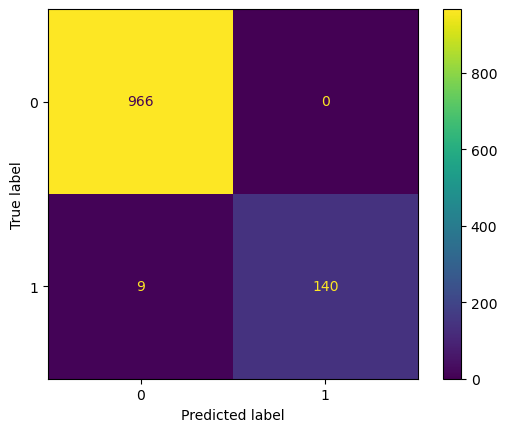

In [22]:
#Print out the accuracy of a Naïve Bayes model in terms of true positive (TP), false positive (FP), true negative (TN), and false negative (FN).
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#Accuracy = (TP+TN)/(TP+FP+FN+TN)
accuracy= (tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
#Precision Score = TP / (FP + TP)
precision=tp/(fp+tp)
print("precision:",precision)
#Recall Score = TP / (FN + TP)
recall=tp/(fn+tp)
print("recall:",recall)
plot_confusion_matrix(NB_classifier, TestData_Freq, y_test)
tn, fp, fn, tp

**Performing basic text data cleaning on input data such as removing stop words and special characters or punctuations**

In [23]:
# importing nltk library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhhaanu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
#displaying stopwords in english
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
#removing the stopwords from SMS_Text column in the dataset
data_SMS['SMStext_without_stopwords'] = data_SMS['SMS_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw_nltk)]))

In [26]:
data_SMS['SMStext_without_stopwords']

0       Go jurong point, crazy.. Available bugis n gre...
1                           Ok lar... Joking wif u oni...
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3               U dun say early hor... U c already say...
4               Nah I think goes usf, lives around though
                              ...                        
5567    This 2nd time tried 2 contact u. U £750 Pound ...
5568                    Will ü b going esplanade fr home?
5569             Pity, * mood that. So...any suggestions?
5570    The guy bitching I acted like i'd interested b...
5571                                  Rofl. Its true name
Name: SMStext_without_stopwords, Length: 5572, dtype: object

In [27]:
#removing special characheters from SMS_Text_without_stopwords column
data_SMS['SMStext_without_stopwords'] = data_SMS['SMStext_without_stopwords'].str.replace('[^\w\s]','')

C:\Users\Bhhaanu\AppData\Local\Temp\ipykernel_5216\4109790082.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_SMS['SMStext_without_stopwords'] = data_SMS['SMStext_without_stopwords'].str.replace('[^\w\s]','')


In [28]:
data_SMS['SMStext_without_stopwords']

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                     U dun say early hor U c already say
4                Nah I think goes usf lives around though
                              ...                        
5567    This 2nd time tried 2 contact u U 750 Pound pr...
5568                     Will ü b going esplanade fr home
5569                    Pity  mood that Soany suggestions
5570    The guy bitching I acted like id interested bu...
5571                                   Rofl Its true name
Name: SMStext_without_stopwords, Length: 5572, dtype: object

In [29]:
#Spliting the data into training and test sets. Use 80% for training and 20% for testing.
from sklearn.model_selection import train_test_split
X = data_SMS["SMStext_without_stopwords"]
y = data_SMS["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
print(X_train,X_test,y_train,y_test)

1978    Reply win 100 weekly Where 2006 FIFA World Cup...
3989    Hello Sort town already That  So dont rush hom...
3935       How come guoyang go n tell her Then u told her
4078    Hey sathya till dint meet even single time saw...
4086    Orange brings ringtones time Chart Heroes free...
                              ...                        
3772    Hi wlcome back wonder got eaten lion something...
5191                                 Sorry Ill call later
5226                Prabhaim sorydarealyfrm heart im sory
5390                             Nt joking seriously told
860                          Did say somebody named tampa
Name: SMStext_without_stopwords, Length: 4457, dtype: object 3245    Squeeeeeze This christmas hug If u lik frndshp...
944     And also Ive sorta blown couple times recently...
1044    Mmm thats better got roast me id b better drin...
2484                  Mm kanji dont eat anything heavy ok
812     So theres ring comes guys costumes Its gift fu...
           

In [31]:
#Extracting the features using word frequencies
from sklearn.feature_extraction.text import CountVectorizer
WordVectorizer=CountVectorizer()
TrainData_Freq = WordVectorizer.fit_transform(X_train.values)
WordVectorizer.vocabulary_
TrainData_Freq.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
#Creating the Multinomial Naïve Bayes classifier
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(TrainData_Freq, y_train)

MultinomialNB()

In [33]:
#Training the model
TestData_Freq = WordVectorizer.transform(X_test)
TestData_Freq=TestData_Freq.toarray()

In [34]:
TestData_Freq

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
NB_classifier.score(TestData_Freq, y_test)

0.9838565022421525

In [36]:
y_pred = NB_classifier.predict(TestData_Freq)

In [37]:
def estimate_label(data):
  return y_pred[data]

In [38]:
estimate_label(3)

0

In [39]:
# defining a function to print out the misclassified data
def misclassify(testData):
  j=0
  misclassified_data= []
  for i in testData:
    #print(i)
    predicted_label = estimate_label(j)
    j=j+1
    #print(predicted_label)
    if(predicted_label != i):
      misclassified_data.append(predicted_label)
      #print("missclassification")
  print(misclassified_data)
  return misclassified_data

In [40]:
#printing out the misclassified data
MISCLASSIFIED = misclassify(y_test)
total = len(y_test)
#print(MISCLASSIFIED)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified labels = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
Accuracy: 0.9838565022421525
Number of misclassified labels = 18 out of 1115


accuracy: 0.9838565022421525
precision: 0.9712230215827338
recall: 0.9060402684563759


C:\Users\Bhhaanu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(962, 4, 14, 135)

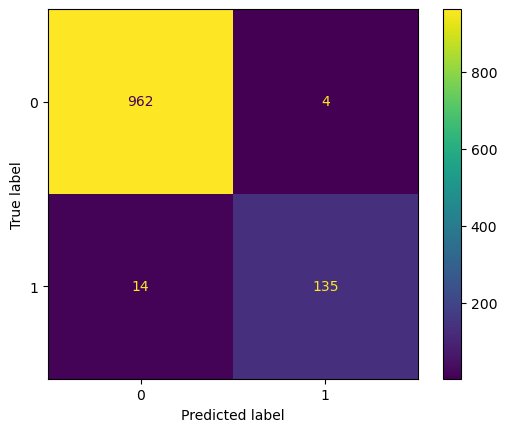

In [41]:
#Print out the accuracy of a Naïve Bayes model in terms of true positive (TP), false positive (FP), true negative (TN), and false negative (FN).
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#Accuracy = (TP+TN)/(TP+FP+FN+TN)
accuracy= (tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
#Precision Score = TP / (FP + TP)
precision=tp/(fp+tp)
print("precision:",precision)
#Recall Score = TP / (FN + TP)
recall=tp/(fn+tp)
print("recall:",recall)
plot_confusion_matrix(NB_classifier, TestData_Freq, y_test)
tn, fp, fn, tp

**Analysis of the Naïve Bayes model performance comparing with and without text data cleaning:** 

My model gives an accuracy of 99% with out cleaning the text data however after performing data cleaning steps like removing stopwords, punctuations and special characters from the dataset it reduced to 98%. Performing tasks like cleaning the textdata without stopwords and punctuations should be an advantage, as it removes useless data and reduces computation time. However the case here is different as the accuracy is decreased but the model is more reliable with text data cleaning.